In [1]:
from sns_toolbox.renderer import render
from sns_toolbox.neurons import SpikingNeuron
from sns_toolbox.connections import SpikingSynapse
import numpy as np
import matplotlib.pyplot as plt
from sns_toolbox.networks import Network

pre_neuron = SpikingNeuron(
    threshold_proportionality_constant=0.0,
    threshold_initial_value=1.0
)
post_neuron = SpikingNeuron(
    threshold_proportionality_constant=0.0,
    threshold_initial_value=1.0
)
synapse = SpikingSynapse(
    reversal_potential=2.0,
    max_conductance=7.0
)

net = Network()

net.add_neuron(pre_neuron, name='Spiker')
net.add_input(dest='Spiker')
net.add_output(source='Spiker', spiking=True)

render(net) 

dt=0.1
tmax=500
t=np.arange(0, tmax, dt)

c = net.compile(dt=0.1, backend='numpy_standard', debug=False)

inputs = np.zeros([len(t), 1])

''''''
inputs[:, 0] = 1.0001
''''''

data = np.zeros([len(t), 1])

for i in range(len(t)):
    data[i, :] = c(inputs[i, :], current_time=t[i], dt=dt)
data = data.transpose()

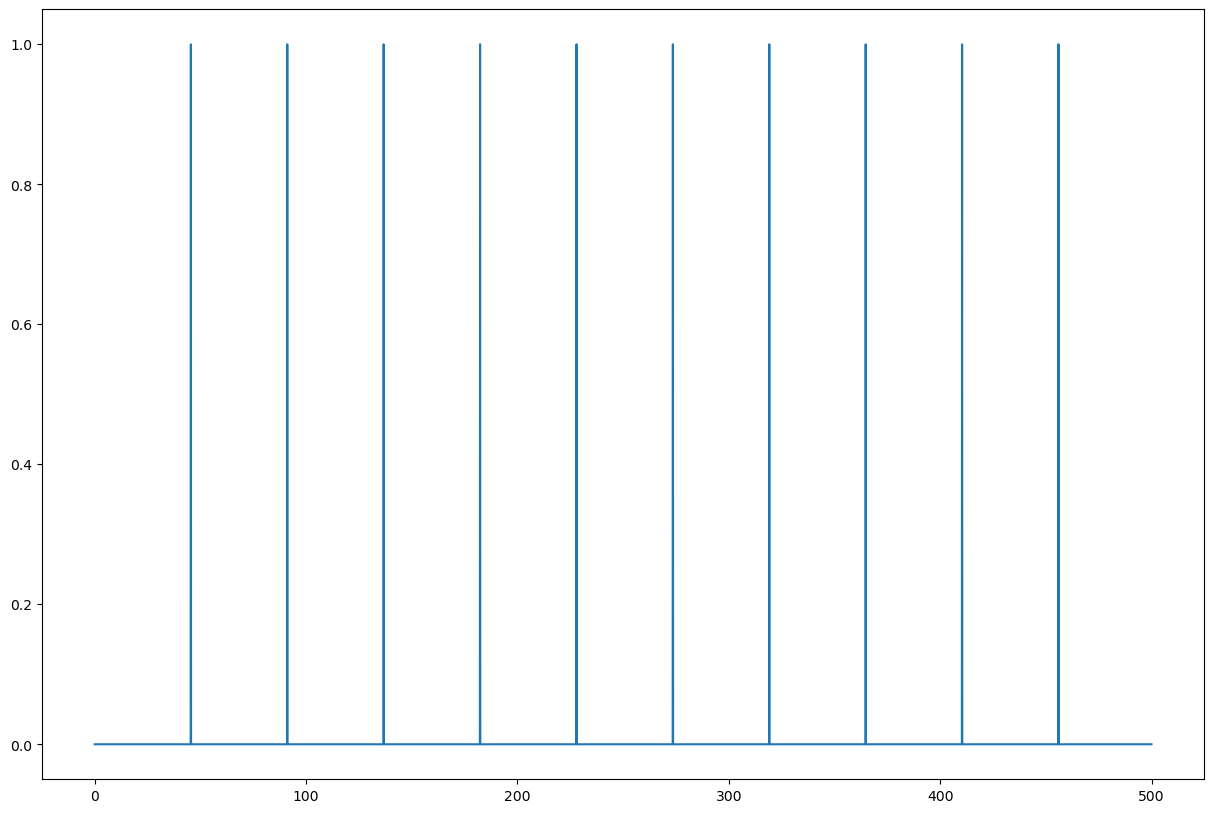

In [2]:
plt.figure(figsize=[15, 10])
plt.plot(t, data[0, :])
plt.show()

In [3]:

# Takes spike data string, returns frequency of spikes
def getFreq(data, dt):
    loc = np.where(data == 1)[0]
    freq = []
    for i in range(len(loc)-1):
        freq.append(1 / ((loc[i+1] - loc[i]) * (dt * 0.001)))
    # The first element needs to be removed because this is inner spike, so more spikes than frequencies recorded
    loc = loc[1:] * dt
    return freq, loc

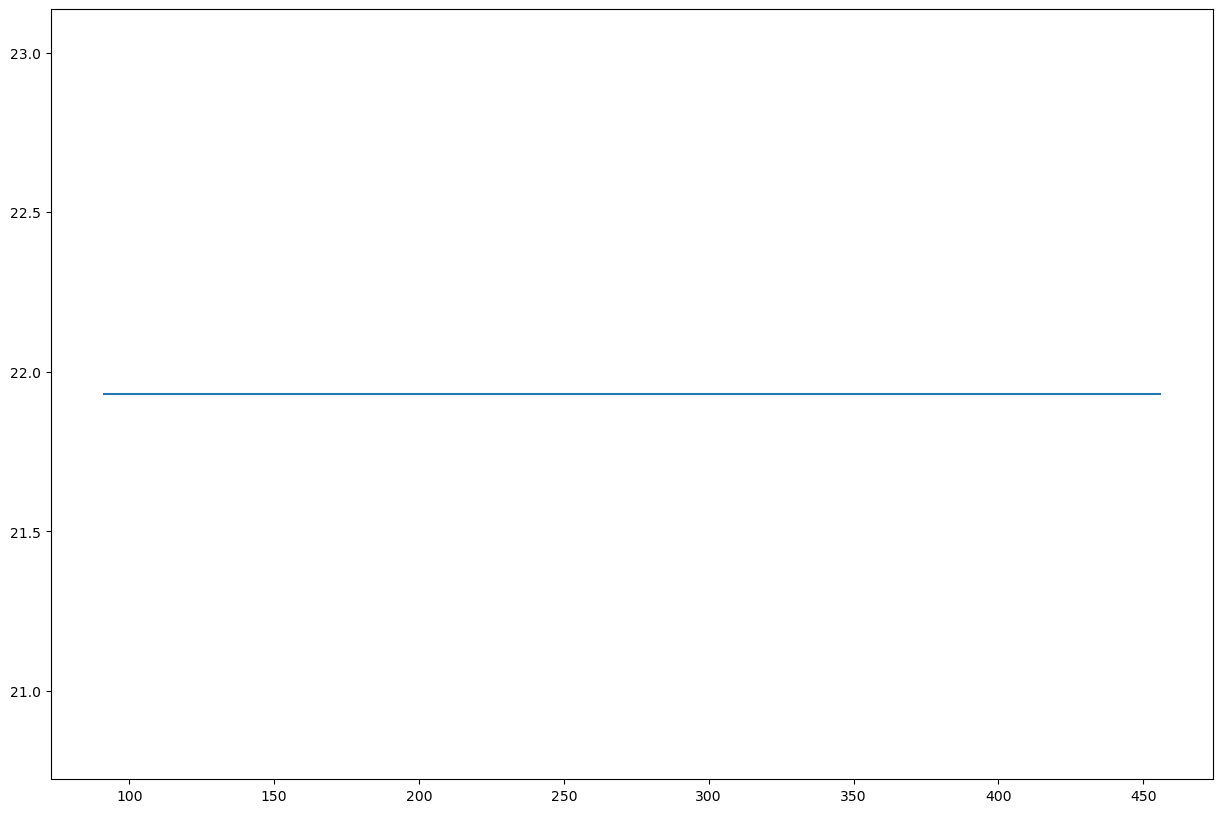

In [4]:
freq1, loc1 = getFreq(data=data[0,:], dt=dt)

plt.figure(figsize=[15, 10])
plt.plot(loc1, freq1)
plt.show()


In [5]:

print(np.mean(freq1))

21.929824561403507
